In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
import matplotlib as mpl
import pandas as pd
import numpy as np 
import seaborn as sns


In [3]:
df=pd.read_csv('thrusterForGraph.csv')
col_idx = df.columns

In [5]:
col_idx=['pwm','force mean', 'std', 'volt']

In [6]:

def FormatCSVforGraph(df, columns):
    # initialize df to append to which will be returned 
    corrected_df=pd.DataFrame(columns=columns)
    
    #have + and - force due to compression and tension on HX711 so need to take absolute value
    df=np.abs(df)
    
    #loop through and make sure there are no duplicate pwm values so that the graph looks clean
    # when we graph 
    
    volt_previous=0
    
    for i in range(df.shape[0]):
        
        row=df.iloc[i]
        pwm, volt=int(row.loc['pwm']), str(row.loc['volt'])
        #set_to_zero=[1475, 1450, 1525,1550]
        set_to_zero=[1475, 1525]

        if pwm in set_to_zero:
            row['force mean']= 0
            row['std']=0

        if volt != volt_previous:
            l=[]
            volt_previous=volt
            
        if pwm not in l:
            l.append(pwm)
            corrected_df.loc[i] = row
            
            
    return corrected_df


In [7]:
x=FormatCSVforGraph(df, col_idx)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


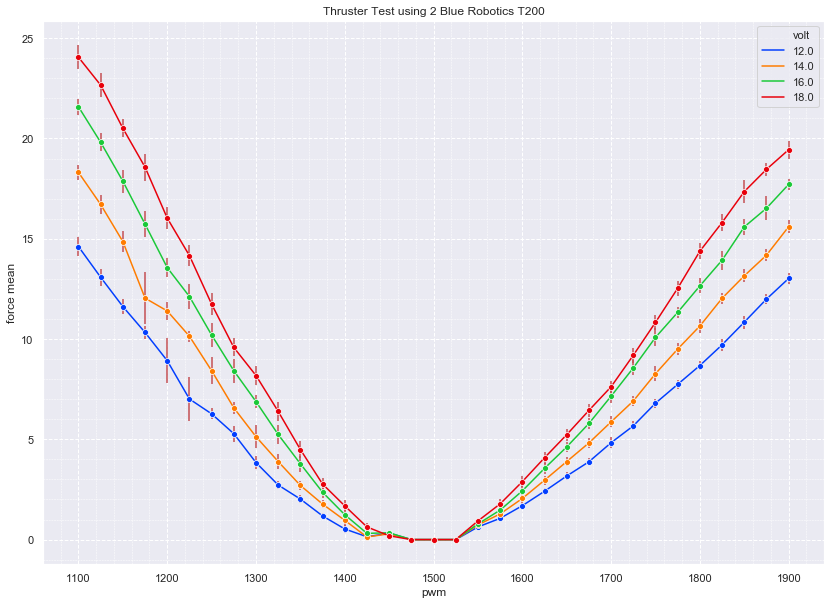

In [248]:
sns.set_style("darkgrid", {
    "ytick.major.size": 0.1,
    "ytick.minor.size": 0.05,
    'grid.linestyle': '--'
 })
palette = sns.color_palette("mako_r", 6)
fig, ax = plt.subplots(figsize=(14,10 ))
palette = sns.color_palette("bright", 4)
g=sns.lineplot(x="pwm", y="force mean",
             hue="volt",  marker='o', palette=palette, data=x)
g.legend(bbox_to_anchor=(1, 1), ncol=1)
plt.errorbar(x=x["pwm"],y=x['force mean'],
            yerr=x['std'], fmt='none', c= 'r')

g.set_title('Thruster Test using 2 Blue Robotics T200')

ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid(b=True, which='major', color='w', linewidth=1.0)
ax.grid(b=True, which='minor', color='w', linewidth=0.5)